In [1]:
# Import libraries
from sklearn.svm import SVC
from sklearn.datasets import make_circles, make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('BestCard_data.csv', usecols=lambda column: column not in ['ID'])  

In [3]:
#show the first few rows of the dataframe
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,none,others,university
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,1,university,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,1000,0,2000,1,university,0,0,0,0,1
2,90000,2,2,2,34,0,0,0,0,0,...,1000,1000,5000,0,university,0,0,0,0,1
3,50000,2,2,1,37,0,0,0,0,0,...,1100,1069,1000,0,university,0,0,0,0,1
4,50000,1,2,1,57,-1,0,-1,0,0,...,9000,689,679,0,university,0,0,0,0,1


In [4]:
#How many unique values exist for the target variable
df['default payment next month'].unique()

array([1, 0])

In [5]:
#what is the shape of the data set
df.shape

(26664, 30)

In [6]:
#do we have any blank variables
df.isnull().any()

LIMIT_BAL                     False
SEX                           False
EDUCATION                     False
MARRIAGE                      False
AGE                           False
PAY_1                         False
PAY_2                         False
PAY_3                         False
PAY_4                         False
PAY_5                         False
PAY_6                         False
BILL_AMT1                     False
BILL_AMT2                     False
BILL_AMT3                     False
BILL_AMT4                     False
BILL_AMT5                     False
BILL_AMT6                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_AMT3                      False
PAY_AMT4                      False
PAY_AMT5                      False
PAY_AMT6                      False
default payment next month    False
EDUCATION_CAT                 False
graduate school               False
high school                   False
none                        

In [7]:
#show the type of variables in the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26664 entries, 0 to 26663
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   26664 non-null  int64 
 1   SEX                         26664 non-null  int64 
 2   EDUCATION                   26664 non-null  int64 
 3   MARRIAGE                    26664 non-null  int64 
 4   AGE                         26664 non-null  int64 
 5   PAY_1                       26664 non-null  int64 
 6   PAY_2                       26664 non-null  int64 
 7   PAY_3                       26664 non-null  int64 
 8   PAY_4                       26664 non-null  int64 
 9   PAY_5                       26664 non-null  int64 
 10  PAY_6                       26664 non-null  int64 
 11  BILL_AMT1                   26664 non-null  int64 
 12  BILL_AMT2                   26664 non-null  int64 
 13  BILL_AMT3                   26664 non-null  in

<Axes: xlabel='default payment next month', ylabel='count'>

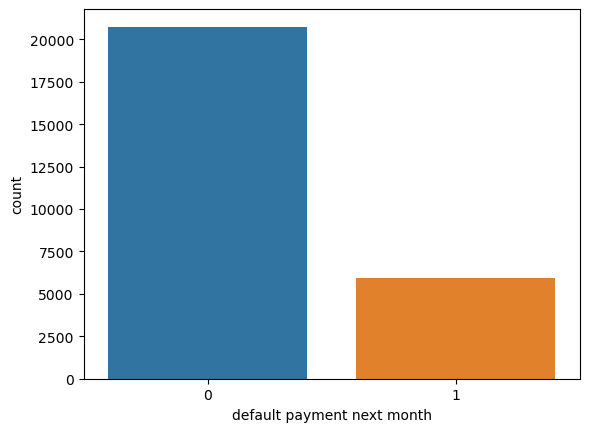

In [8]:
#Plot the frequency of the target variable values
sns.countplot(x='default payment next month',data=df)

In [9]:
#list the columns
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'none', 'others', 'university'],
      dtype='object')

In [10]:
# Preprocessing
# Drop columns not useful for model training
data_cleaned = df.drop(['EDUCATION_CAT', 'EDUCATION'], axis=1)

In [11]:
# Compute the correlation matrix
corr_matrix = data_cleaned.corr()

In [12]:
#print the correlation matrix
print(corr_matrix)

                            LIMIT_BAL       SEX  MARRIAGE       AGE     PAY_1  \
LIMIT_BAL                    1.000000  0.027046 -0.111873  0.149157 -0.273396   
SEX                          0.027046  1.000000 -0.031307 -0.088421 -0.058993   
MARRIAGE                    -0.111873 -0.031307  1.000000 -0.412828  0.019759   
AGE                          0.149157 -0.088421 -0.412828  1.000000 -0.044277   
PAY_1                       -0.273396 -0.058993  0.019759 -0.044277  1.000000   
PAY_2                       -0.296471 -0.070828  0.025096 -0.054053  0.675430   
PAY_3                       -0.286613 -0.067869  0.034308 -0.055795  0.575617   
PAY_4                       -0.269296 -0.060820  0.033082 -0.054972  0.539238   
PAY_5                       -0.249555 -0.055418  0.036830 -0.059438  0.509140   
PAY_6                       -0.236037 -0.043668  0.033366 -0.053532  0.475740   
BILL_AMT1                    0.287009 -0.032336 -0.028610  0.056245  0.185826   
BILL_AMT2                   

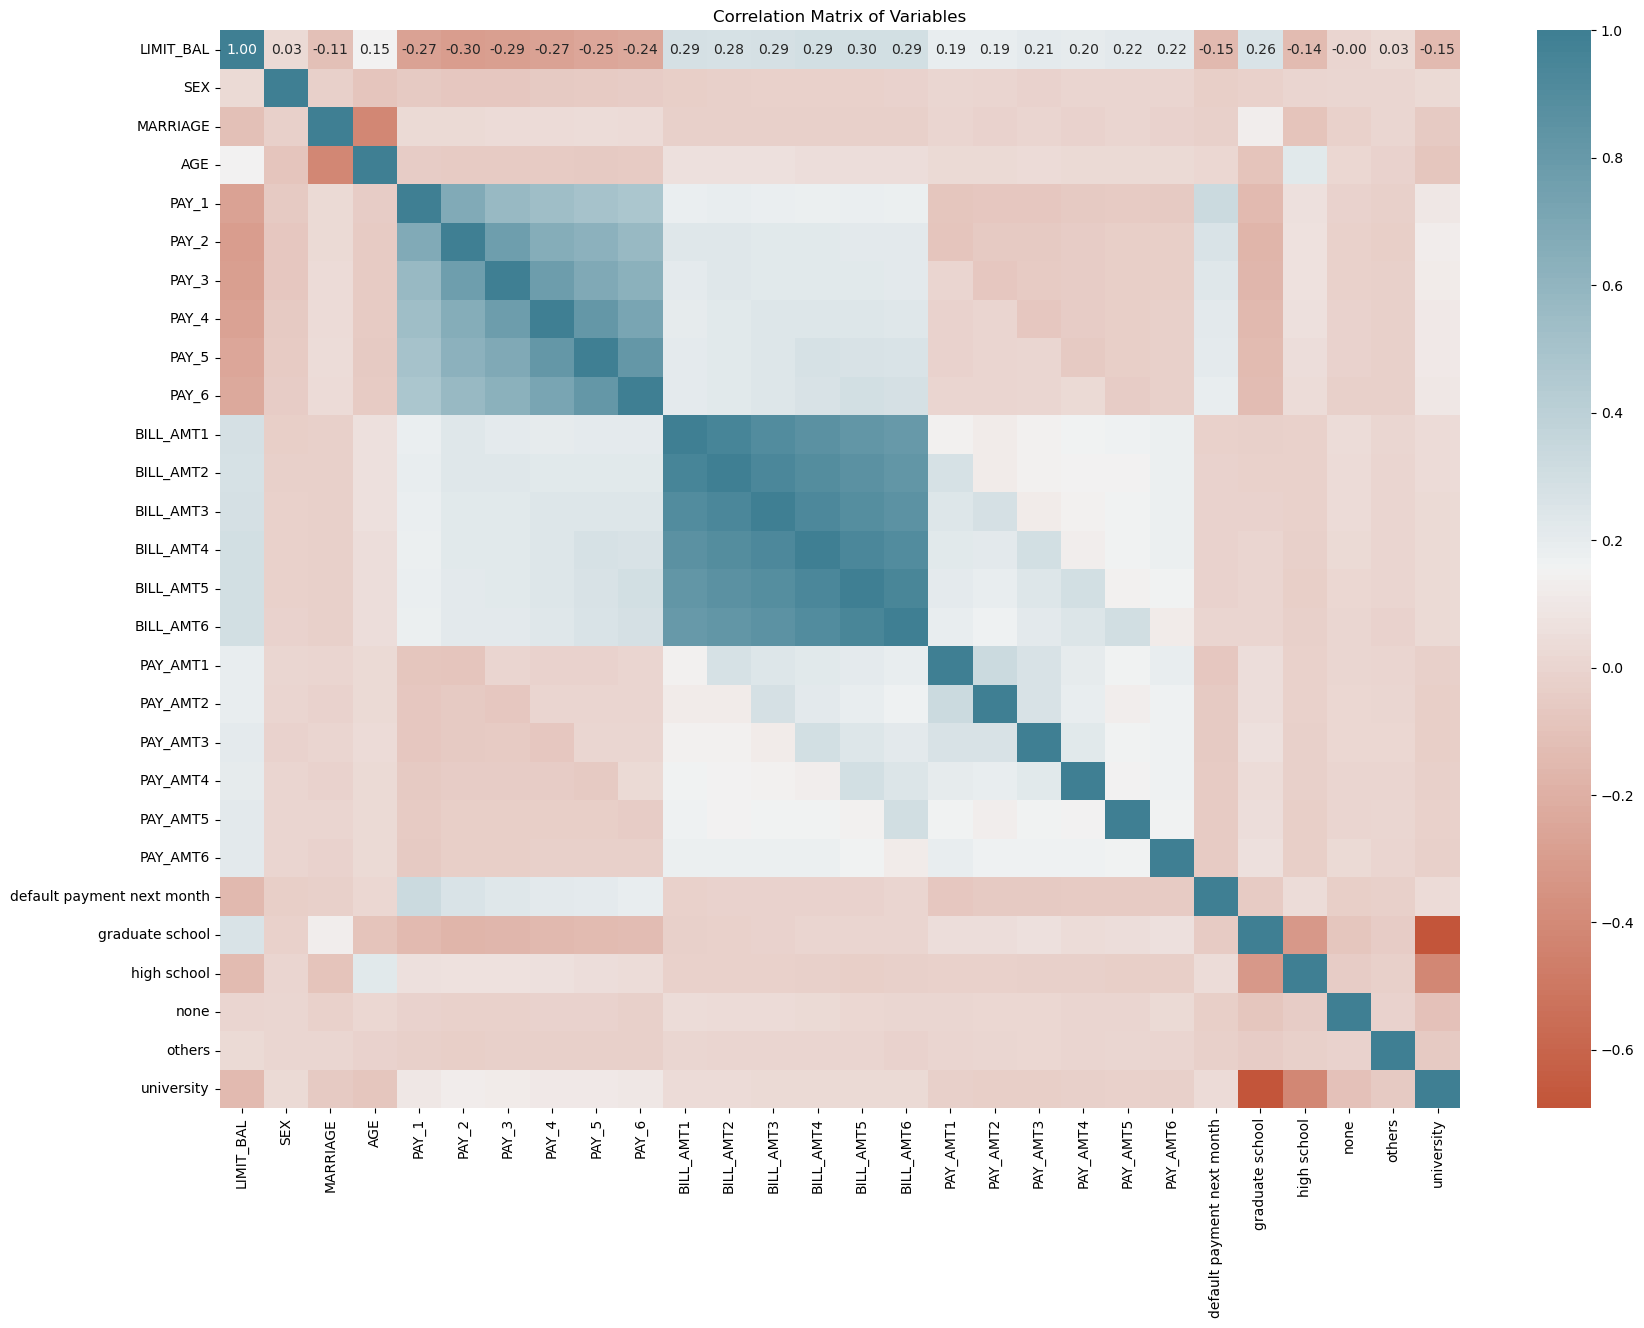

In [13]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20, 14))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap = sns.diverging_palette(20, 220, n=200))
plt.title("Correlation Matrix of Variables")
plt.show()

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


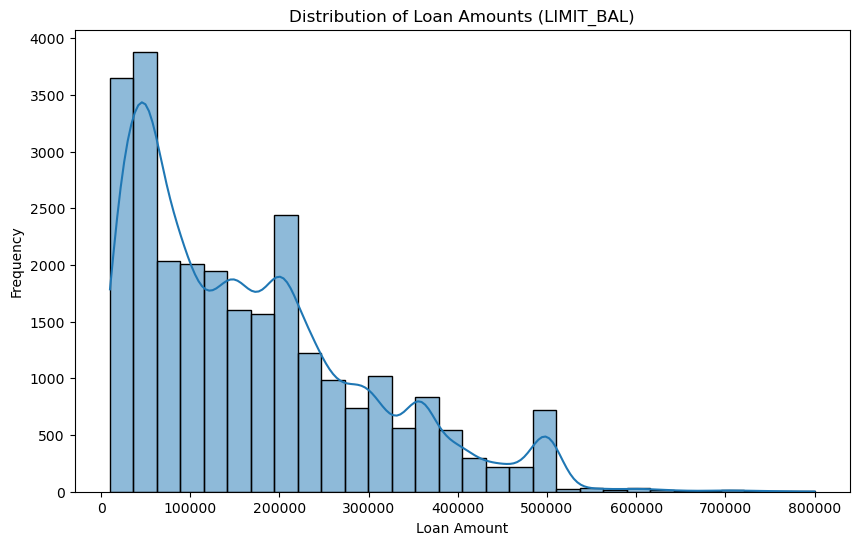

In [14]:
# Plot the distribution of loan amounts to determine whether to use mean or median
plt.figure(figsize=(10, 6))
sns.histplot(df['LIMIT_BAL'], kde=True, bins=30)
plt.title('Distribution of Loan Amounts (LIMIT_BAL)')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


In [15]:
#calculate the mean values of loan amounts
# We can use this to translate TP,TN, FP and FN to determine cost and value or our model to the client
# Calculate the mean loan amount (LIMIT_BAL) from the dataset
mean_loan_amount = df['LIMIT_BAL'].mean()

# Display the mean loan amount
print("Mean Loan Amount is $",mean_loan_amount)

Mean Loan Amount is $ 167919.05490549054


In [16]:
#calculate the median values of loan amounts
# We can use this to translate TP,TN, FP and FN to determine cost and value or our model to the client
# Calculate the mean loan amount (LIMIT_BAL) from the dataset
median_loan_amount = df['LIMIT_BAL'].median()

# Display the mean loan amount
print("Median Loan Amount is $",median_loan_amount)

Median Loan Amount is $ 140000.0


In [17]:
# Split the data into features (X) and the target variable (y)
X = data_cleaned.drop('default payment next month', axis=1)
y = data_cleaned['default payment next month']

In [18]:
# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [19]:
#print to view the columns
X

,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,graduate school,high school,none,others,university
0,20000,2,1,24,2,2,-1,-1,-2,-2,...,689,0,0,0,0,0,0,0,0,1
1,120000,2,2,26,-1,2,0,0,0,2,...,1000,1000,1000,0,2000,0,0,0,0,1
2,90000,2,2,34,0,0,0,0,0,0,...,1500,1000,1000,1000,5000,0,0,0,0,1
3,50000,2,1,37,0,0,0,0,0,0,...,2019,1200,1100,1069,1000,0,0,0,0,1
4,50000,1,1,57,-1,0,-1,0,0,0,...,36681,10000,9000,689,679,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,220000,1,1,39,0,0,0,0,0,0,...,20000,5003,3047,5000,1000,0,1,0,0,0
26660,150000,1,2,43,-1,-1,-1,-1,0,0,...,3526,8998,129,0,0,0,1,0,0,0
26661,30000,1,2,37,4,3,2,-1,0,0,...,0,22000,4200,2000,3100,0,0,0,0,1
26662,80000,1,1,41,1,-1,0,0,0,-1,...,3409,1178,1926,52964,1804,0,1,0,0,0


In [20]:
# Apply get_dummies to the DataFrame without the 'ID' column
X_dummies = pd.get_dummies(X, drop_first=True)

In [21]:
# Output to verify
print(X_dummies.shape)
print(X_dummies.columns.tolist())

(26664, 27)
['LIMIT_BAL', 'SEX', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'graduate school', 'high school', 'none', 'others', 'university']


In [22]:
#perform label encoding
from sklearn.preprocessing import LabelEncoder
labelencoder_df = LabelEncoder()
y = labelencoder_df.fit_transform(df['default payment next month'].values)


In [23]:
#confirm by printing the target variable
y

array([1, 1, 0, ..., 1, 1, 1])

In [24]:
#split the data into test and training data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

Single Decision Tree

In [25]:
#run the single decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(accuracy_score(y_pred, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.726


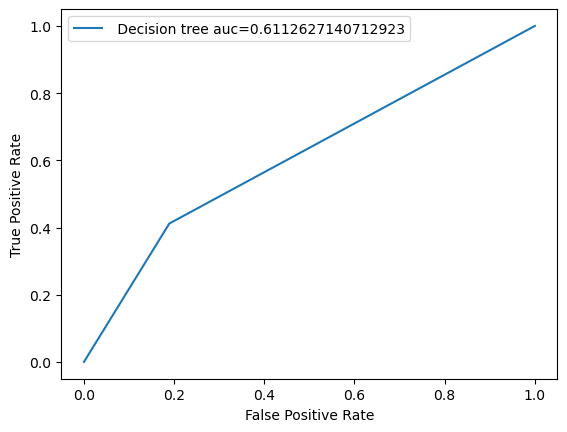

In [26]:
# create roc curve and calculate auc value
from matplotlib import pyplot as pyplot
from sklearn import metrics
y_pred_proba = tree.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
pyplot.plot(fpr,tpr,label=" Decision tree auc="+ str(auc))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
pyplot.show()

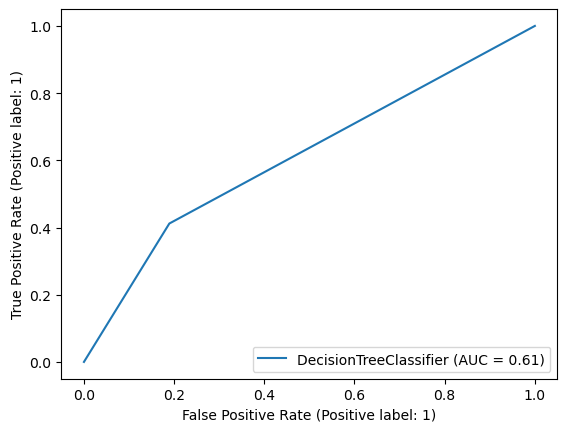

In [27]:
#another version of the ROC curve
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(tree, X_test, y_test)
#plt.show()

Cross Validation

In [28]:
#perform cross validation and print accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree, X, y, cv= 5)
print("Accuracy scores of each fold: {}".format(scores))
#A common way to summarize the cross-validation accuracy is to compute the mean:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Accuracy scores of each fold: [0.72079505 0.71141946 0.72848303 0.74010876 0.72468117]
Average cross-validation score: 0.73


Bagging

In [29]:
#performing bagging and print accuracy
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(n_estimators=100, random_state=0)
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
bagging.fit(X_train, y_train)
y_bagging_pred = bagging.predict(X_test)
print("Bagging Model Accuracy on test set: {:.3f}".format(accuracy_score(y_test,y_bagging_pred)))

Bagging Model Accuracy on test set: 0.822


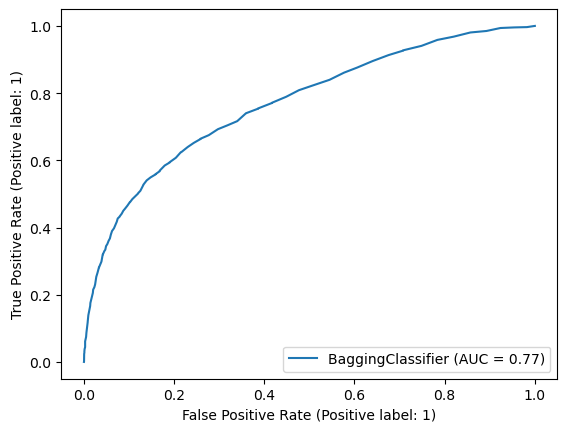

In [30]:
#print Bagging ROC curve
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(bagging, X_test, y_test)
#plt.show()

Boosting

In [31]:
#perform boosting and print accuracy
from sklearn.ensemble import AdaBoostClassifier
boost = AdaBoostClassifier(n_estimators = 100, random_state=0)
boost.fit(X_train, y_train)
y_boost_pred = boost.predict(X_test)
print("Accuracy on test set: {:.3f}".format(accuracy_score(y_boost_pred, y_test)))

Accuracy on test set: 0.829


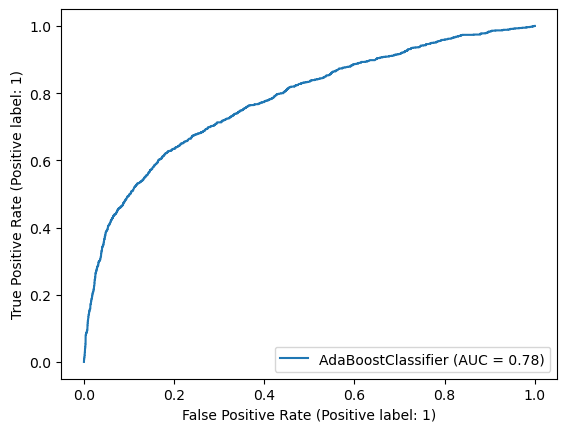

In [32]:
#display Boosting ROC curve
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(boost, X_test, y_test)
#plt.show()

Ensemble - Random Forest

In [33]:
#perform Ensemble - Random Forest and print accuracy
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=1000, random_state=0)
forest.fit(X_train, y_train)
y_rf_pred = forest.predict(X_test)
print("Random Forest Accuracy on test set: {:.3f}".format(accuracy_score(y_test, y_rf_pred)))

Random Forest Accuracy on test set: 0.822


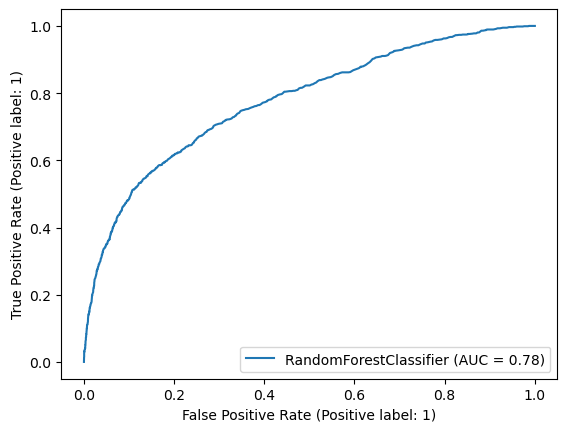

In [34]:
#print ROC curve for Random Forest
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(forest, X_test, y_test)
#plt.show()

In [35]:
#Calculate and print importance
importances = forest.feature_importances_
df = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
df = df.sort_values('importance', ascending=False)
print(df)

            feature  importance
4             PAY_1    0.097495
3               AGE    0.066670
10        BILL_AMT1    0.060905
0         LIMIT_BAL    0.058676
11        BILL_AMT2    0.054250
12        BILL_AMT3    0.050753
15        BILL_AMT6    0.049876
16         PAY_AMT1    0.049595
13        BILL_AMT4    0.049449
14        BILL_AMT5    0.049419
17         PAY_AMT2    0.046788
21         PAY_AMT6    0.046247
18         PAY_AMT3    0.045588
5             PAY_2    0.045220
20         PAY_AMT5    0.043217
19         PAY_AMT4    0.042663
6             PAY_3    0.029138
7             PAY_4    0.023290
8             PAY_5    0.020340
9             PAY_6    0.018085
2          MARRIAGE    0.013019
1               SEX    0.011845
26       university    0.009560
22  graduate school    0.008593
23      high school    0.007699
24             none    0.001235
25           others    0.000383


In [36]:
#get parameters
tree = DecisionTreeClassifier(random_state=0)
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [37]:
#trying a less compute-intensive search option first for comparison
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Assuming 'tree' is a Decision Tree model, instantiate it
tree = DecisionTreeClassifier()

params = {'criterion': ['gini', 'entropy'], 'max_leaf_nodes': list(range(2, 50)),'max_depth': np.arange(3, 15)}

# Use RandomizedSearchCV with n_iter and n_jobs parameters
tree_random = RandomizedSearchCV(tree, params, n_iter=100, cv=10, n_jobs=-1, random_state=42)


tree_random.fit(X_train, y_train)


RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8,
                                                           9, 10, 11, 12, 13,
                                                           14, 15, 16, 17, 18,
                                                           19, 20, 21, 22, 23,
                                                           24, 25, 26, 27, 28,
                                                           29, 30, 31, ...]},
                   random_state=42)

In [38]:
#output best estimator
tree_random.best_estimator_

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=25)

In [39]:
# Predictions on the test set
y_pred = tree_random.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

#print accuracy
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 82.77%


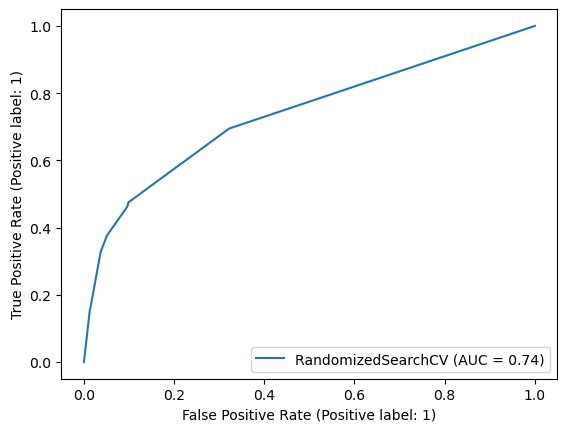

In [40]:
#plot ROC curve on RandomizedSearchCV
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(tree_random, X_test, y_test)
#plt.show()

In [41]:
#Running the more compute intensive Grid search option
import numpy as np
from sklearn.model_selection import GridSearchCV
params = {'criterion':['gini','entropy'],'max_leaf_nodes': list(range(2, 50)), 'max_depth': np.arange(3, 15)}
tree_grid = GridSearchCV(tree, params, cv=10)
tree_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...]})

In [42]:
#output best estimator
tree_grid.best_estimator_

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=8)

In [43]:
#print GridSearchCV accuracy
y_pred_grid = tree_grid.predict(X_test)
print("Grid-search Model Accuracy on test set: {:.3f}".format(accuracy_score(y_test, y_pred_grid)))

Grid-search Model Accuracy on test set: 0.828


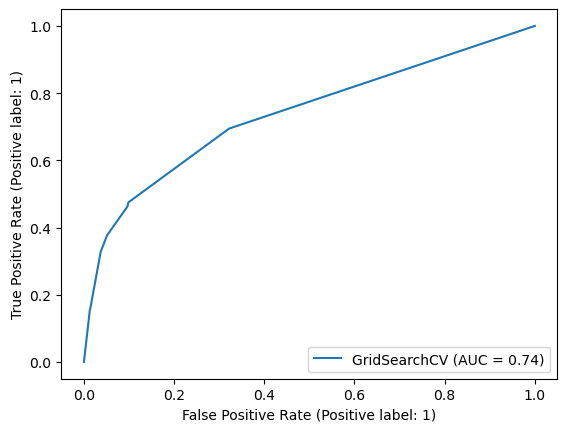

In [44]:
#plot ROC curve
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(tree_grid, X_test, y_test)
#plt.show()

SVM

In [45]:
#svm start here
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
# perform SVM with Linear Kernel and print accuracy and classification report
svm_linear = SVC(kernel='linear', class_weight='balanced', random_state=0)
svm_linear.fit(X_train_scaled, y_train)
y_pred_linear = svm_linear.predict(X_test_scaled)
print("SVM with Linear Kernel - Accuracy:", accuracy_score(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))

SVM with Linear Kernel - Accuracy: 0.7702981436339771
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      4204
           1       0.46      0.55      0.50      1129

    accuracy                           0.77      5333
   macro avg       0.67      0.69      0.68      5333
weighted avg       0.79      0.77      0.78      5333



In [47]:
# Logistic Regression as an alternative
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=0)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
print("Logistic Regression - Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression - Accuracy: 0.6836677292330771
              precision    recall  f1-score   support

           0       0.88      0.69      0.78      4204
           1       0.36      0.65      0.46      1129

    accuracy                           0.68      5333
   macro avg       0.62      0.67      0.62      5333
weighted avg       0.77      0.68      0.71      5333



In [48]:
# SVM with RBF Kernel
# perform SVM with RBF Kernel and print accuracy and classification report
svm_rbf = SVC(kernel='rbf', class_weight='balanced', random_state=0)
svm_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_test_scaled)
print("SVM with RBF Kernel - Accuracy:", accuracy_score(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))

SVM with RBF Kernel - Accuracy: 0.7832364522782674
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      4204
           1       0.49      0.59      0.53      1129

    accuracy                           0.78      5333
   macro avg       0.69      0.71      0.70      5333
weighted avg       0.80      0.78      0.79      5333



In [49]:
# Perform a grid search to find the best parameters
#Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
    'kernel': ['rbf', 'linear']  # Specifies the kernel type to be used in the algorithm
}

In [50]:
# Initialize the SVM classifier
svm = SVC()

In [51]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, n_jobs=-1, cv=5, verbose=2, scoring='accuracy')


In [52]:
# Fit GridSearchCV to the training data
grid_search.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  43.2s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=  42.6s
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time=  43.8s
[CV] END .....................C=1, gamma=auto, kernel=linear; total time= 1.9min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  37.6s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=  40.1s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time= 1.0min
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=  53.2s
[CV] END .......................C=10, gamma=auto, kernel=rbf; total time=  52.4s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  39.2s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=  31.8s
[CV] END .......................C=1, gamma=scale

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy', verbose=2)

In [53]:
# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Score: 0.8172143394651723


In [54]:
# Evaluate the best model found by GridSearchCV on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

In [55]:
# Print the evaluation metrics
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy on Test Set: 0.8301143821488843
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      4204
           1       0.70      0.34      0.46      1129

    accuracy                           0.83      5333
   macro avg       0.77      0.65      0.68      5333
weighted avg       0.81      0.83      0.81      5333



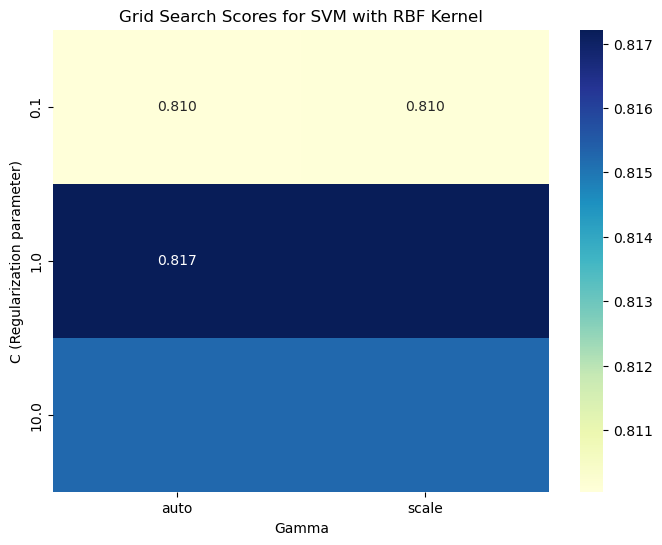

In [56]:
# Convert grid search results into a DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Filter the results for the 'rbf' kernel (if multiple kernels were tested)
rbf_results = results[results['param_kernel'] == 'rbf']

# Pivot the data for heatmap plotting
pivot_table = rbf_results.pivot(index='param_C', columns='param_gamma', values='mean_test_score')


# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("Grid Search Scores for SVM with RBF Kernel")
plt.xlabel("Gamma")
plt.ylabel("C (Regularization parameter)")
plt.show()

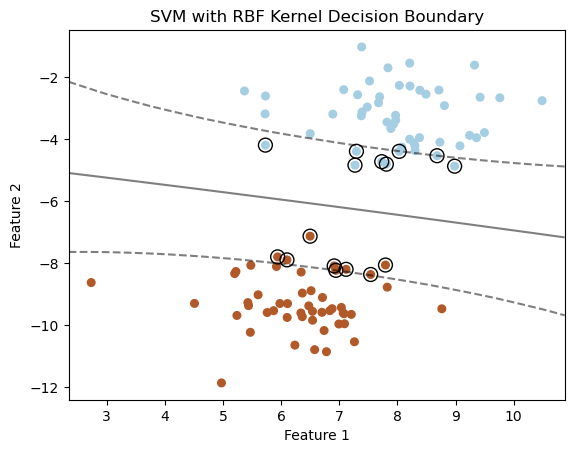

In [57]:
#Plot SVM with RBF Kernel Decision Boundary
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

# Step 1: Generate a synthetic 2D dataset
X, y = make_blobs(n_samples=100, centers=2, random_state=6)

# Step 2: Train SVM model with RBF kernel on the dataset
svm_rbf = SVC(kernel='rbf', C=1)
svm_rbf.fit(X, y)

# Step 3: Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_rbf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Plot support vectors
ax.scatter(svm_rbf.support_vectors_[:, 0], svm_rbf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM with RBF Kernel Decision Boundary')
plt.show()



In [58]:
#calculate confusion matrix from svm
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rbf)

In [59]:
#Print cm
cm

array([[3512,  692],
       [ 464,  665]])

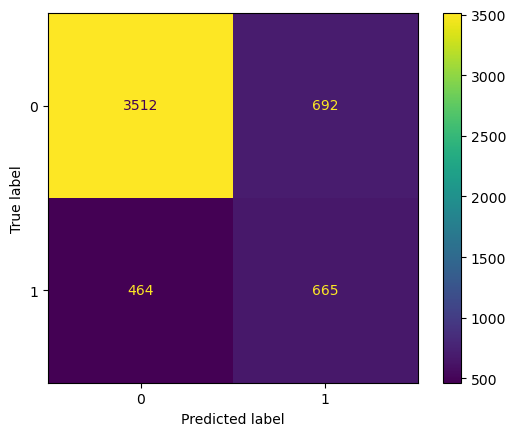

In [60]:
#display fancy confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Displaying the confusion matrix in a graph
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()


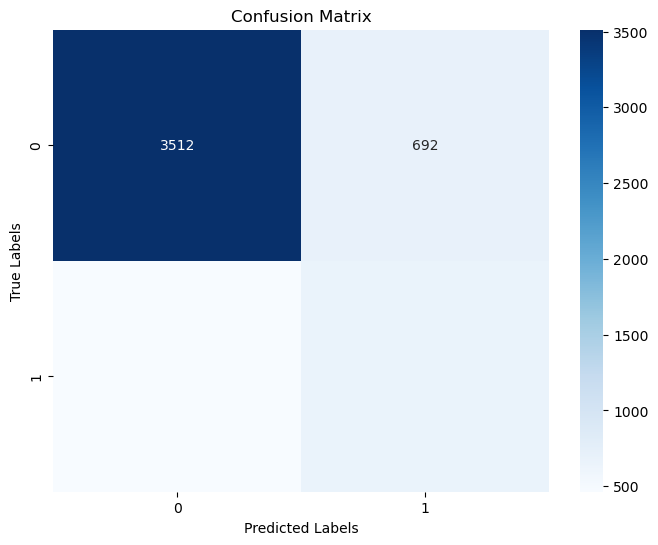

In [61]:
#show heatmap of confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [65]:
mean_loan_amount


167919.05490549054

In [63]:
#calculate values using mean
#Financial Impact=(TP×VTP​)+(TN×VTN​)−(FP×CFP​)−(FN×CFN​)

# Assumptions
recovery_rate = 0.5  # Assuming 50% of the loan amount is lost in case of a default
annual_interest_rate = 0.05  # Assuming a 5% annual interest rate

# Calculating costs and values
C_FN = mean_loan_amount * recovery_rate  # Cost of False Negative
C_FP = mean_loan_amount * annual_interest_rate  # Cost of False Positive
V_TP = C_FN  # Value of True Positive is considered the same as the cost avoided by predicting a default
V_TN = mean_loan_amount * annual_interest_rate  # Value of True Negative is considered as the interest income

# Given confusion matrix values
TN, FP, FN, TP = 3512, 692, 464, 665

# Calculate the total financial impact
total_impact = (TP * V_TP) + (TN * V_TN) - (FP * C_FP) - (FN * C_FN)

# Print the financial values and total impact
print("Analysis of Financial Values and Total Impact Using Mean")
print("Cost of False Negative (C_FN):", C_FN)
print("Cost of False Positive (C_FP):", C_FP)
print("Value of True Positive (V_TP):", V_TP)
print("Value of True Negative (V_TN):", V_TN)
print("Total Financial Impact Using Mean Value:", total_impact)


Analysis of Financial Values and Total Impact Using Mean
Cost of False Negative (C_FN): 83959.52745274527
Cost of False Positive (C_FP): 8395.952745274528
Value of True Positive (V_TP): 83959.52745274527
Value of True Negative (V_TN): 8395.952745274528
Total Financial Impact Using Mean Value: 40552451.75967597


In [66]:
median_loan_amount

140000.0

In [64]:
#calculate values using median
#Financial Impact=(TP×VTP​)+(TN×VTN​)−(FP×CFP​)−(FN×CFN​)

# Assumptions
recovery_rate = 0.5  # Assuming 50% of the loan amount is lost in case of a default
annual_interest_rate = 0.05  # Assuming a 5% annual interest rate

# Calculating costs and values
C_FN_med = median_loan_amount * recovery_rate  # Cost of False Negative
C_FP_med = median_loan_amount * annual_interest_rate  # Cost of False Positive
V_TP_med = C_FN  # Value of True Positive is considered the same as the cost avoided by predicting a default
V_TN_med = median_loan_amount * annual_interest_rate  # Value of True Negative is considered as the interest income

# Given confusion matrix values
TN, FP, FN, TP = 3512, 692, 464, 665

# Calculate the total financial impact
total_impact_med = (TP * V_TP_med) + (TN * V_TN_med) - (FP * C_FP_med) - (FN * C_FN_med)

# Print the financial values and total impact
print("Analysis of Financial Values and Total Impact Using Median")
print("Cost of False Negative (C_FN_med):", C_FN_med)
print("Cost of False Positive (C_FP_med):", C_FP_med)
print("Value of True Positive (V_TP_med):", V_TP_med)
print("Value of True Negative (V_TN_med):", V_TN_med)
print("Total Financial Impact Using Median Value:", total_impact_med)


Analysis of Financial Values and Total Impact Using Median
Cost of False Negative (C_FN_med): 70000.0
Cost of False Positive (C_FP_med): 7000.0
Value of True Positive (V_TP_med): 83959.52745274527
Value of True Negative (V_TN_med): 7000.0
Total Financial Impact Using Median Value: 43093085.756075606
